# Diabetes Patients Predictive Analysis System

This project focuses on predictive analysis for diabetes diagnosis.

Dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes based on certain diagnostic measurements included in the dataset.

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

From the data set in the (.csv) File We can find several variables, some of them are independent (several medical predictor variables) and only one target dependent variable (Outcome).

| Features                 | Description                                             |
|--------------------------|---------------------------------------------------------|
| *Pregnancies*            | The number of pregnancies a patient has had.          |
| *Glucose*                | Plasma glucose concentration, an indicator of blood sugar levels. |
| *BloodPressure*          | Diastolic blood pressure.                               |
| *SkinThickness*          | Skinfold thickness, which may be related to body composition. |
| *Insulin*                | 2-Hour serum insulin level.                             |
| *BMI*                    | A measure of body weight and height, indicating body fat. |
| *DiabetesPedigreeFunction* | A measure of the diabetes heredity risk based on family history. |
| *Age*                    | The age of the patient in years.                        |
| *Outcome*                | The target variable indicating whether the patient has diabetes (1 for positive, 0 for negative). |


In [80]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression

In [2]:
# load dataset

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Analysing the Dataset

# size of dataset
df.shape

(768, 9)

In [4]:
# 768 rows and 9 columns in total

# Exploratory Data Analysis (EDA)

In [5]:
# total unique value in every column of dataset
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [6]:
# Variable identification of every column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

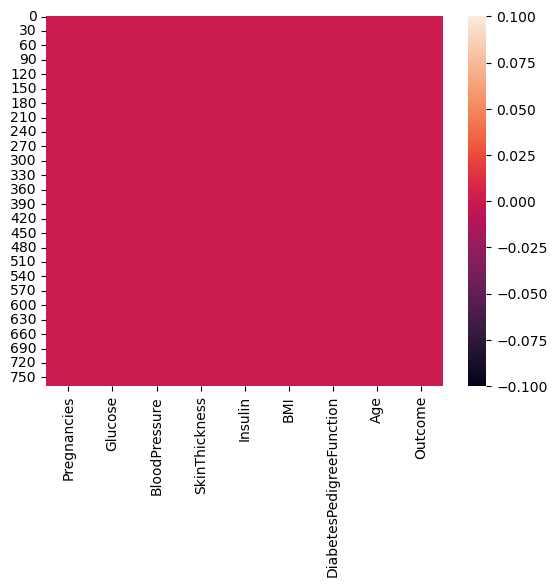

In [22]:
sns.heatmap(df.isnull())

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# maximum number of column variables are int and 2 columns are float
# since 

In [23]:
# correlation matrix
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128987,0.184307,-0.084349,-0.077793,0.024681,-0.034448,0.546107,0.220392
Glucose,0.128987,1.000000,0.197865,0.059806,0.315856,0.235542,0.138648,0.267086,0.479158
BloodPressure,0.184307,0.197865,1.000000,0.152644,0.050080,0.282544,0.029203,0.300509,0.113301
SkinThickness,-0.084349,0.059806,0.152644,1.000000,0.488101,0.401494,0.184689,-0.118567,0.073125
Insulin,-0.077793,0.315856,0.050080,0.488101,1.000000,0.209665,0.185778,-0.066530,0.124721
BMI,0.024681,0.235542,0.282544,0.401494,0.209665,1.000000,0.144185,0.039462,0.309739
DiabetesPedigreeFunction,-0.034448,0.138648,0.029203,0.184689,0.185778,0.144185,1.000000,0.033561,0.173844
Age,0.546107,0.267086,0.300509,-0.118567,-0.066530,0.039462,0.033561,1.000000,0.238356
Outcome,0.220392,0.479158,0.113301,0.073125,0.124721,0.309739,0.173844,0.238356,1.000000


<Axes: >

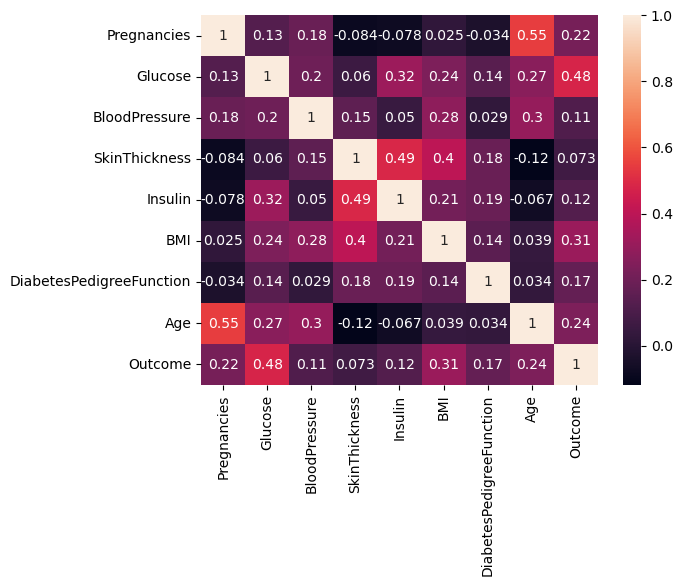

In [35]:
sns.heatmap(df.corr(), annot=True)

In [10]:
df.loc[(df['Pregnancies']==7) & (df['Age']==24)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
49,7,105,0,0,0,0.0,0.305,24,0


In [11]:
# Univariate Analysis for number columns

df.select_dtypes(include = np.number).columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

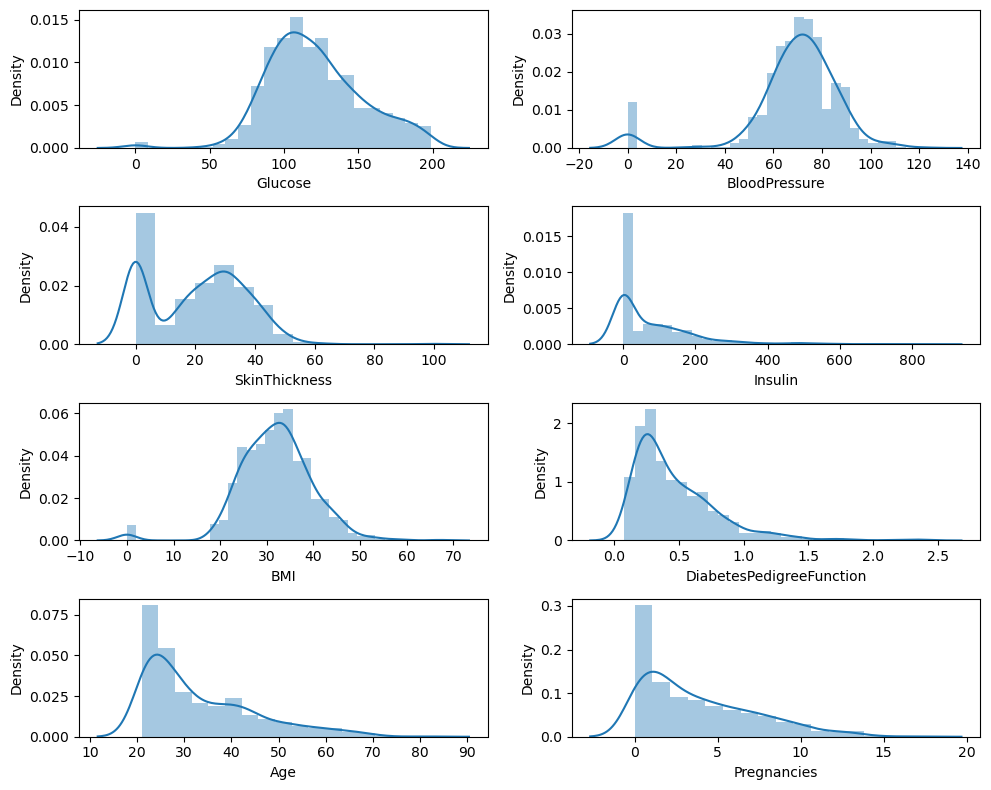

In [12]:
num_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies']

nrows = 4
ncols = 2
iterator = 1

plt.figure(figsize=(10,8))
for i in num_cols:
    plt.subplot(nrows,ncols,iterator)
    sns.distplot(df.loc[:,i])
    iterator = iterator+1

plt.tight_layout()
plt.show()

In [13]:
# Univariate Analysis for categorical columns which are number but needs to considered as categories
# In this case, Pregnancies

Text(0, 0.5, 'Frequency')

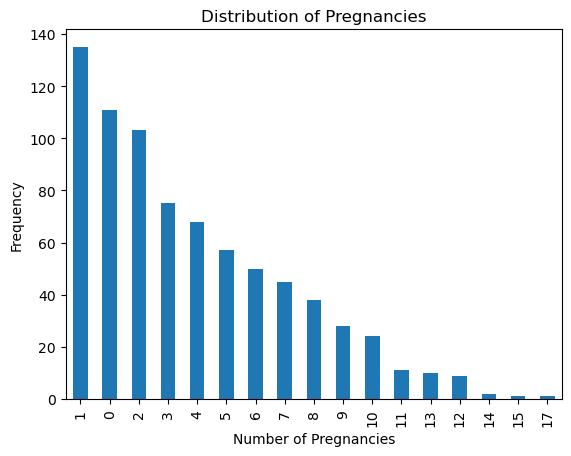

In [14]:
ax = df['Pregnancies'].value_counts().plot(kind = 'bar')
ax.set_title('Distribution of Pregnancies')
ax.set_xlabel('Number of Pregnancies')
ax.set_ylabel('Frequency')

# Checking outlier

In [16]:
import plotly.graph_objs as go

# Create a list to store the box plot traces
box_traces = []

# Iterate through each column and create a box plot
for column in df.columns:
    if column != 'Outcome':  # Exclude target column 'Outcome'
        trace = go.Box(y=df[column], name=column)
        box_traces.append(trace)

# Create a layout
layout = go.Layout(title='Box Plots for Dataset Columns')

# Create a figure and add the traces and layout
fig = go.Figure(data=box_traces, layout=layout)

# Show the figure
fig.show()

In [19]:
#Create a function to handle Outliers
def remove_outliers(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    data[column_name] = data[column_name].clip(lower=lower_limit, upper=upper_limit)
    return data

#Handle outliers using "remove_outliers" function

df = remove_outliers(df, 'Pregnancies')
df = remove_outliers(df, 'Glucose')
df = remove_outliers(df, 'BloodPressure')
df = remove_outliers(df, 'SkinThickness')
df = remove_outliers(df, 'Insulin')
df = remove_outliers(df, 'BMI')

In [20]:
import plotly.graph_objs as go

# Create a list to store the box plot traces
box_traces = []

for column in df.columns:
    if column != 'Outcome':  # Exclude 'Outcome' if it's the target variable
        trace = go.Box(y=df[column], name=column)
        box_traces.append(trace)

# Create a layout
layout = go.Layout(title='Box Plots for Dataset Columns')

# Create a figure and add the traces and layout
fig = go.Figure(data=box_traces, layout=layout)

# Show the figure
fig.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


In [38]:
df['Pregnancies']=round(df['Pregnancies'].astype('int64'))
df['Glucose']=round(df['Glucose'].astype('int64'))
df['Insulin']=round(df['Insulin'].astype('int64'))

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [41]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [50]:
# sepearting independent and dependent colum
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age',]]
y = df['Outcome']

In [51]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [52]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [57]:
# Spliting dataset into train and test

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=47)

In [60]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((537, 8), (231, 8), (537,), (231,))

# Feature Scaling

In [64]:
# using standard scaler to scale data in same measure

sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.fit_transform(Xtest)

In [68]:
Xtrain

array([[-0.86778549,  0.25037547, -0.08960066, ..., -0.89021667,
         0.03280581, -0.9530453 ],
       [ 0.90520427,  2.08600249, -1.5216112 , ...,  0.23791631,
         1.12211901,  0.05391058],
       [-0.2767889 ,  1.57073876,  0.05360039, ...,  0.15330634,
        -0.80725777, -0.78521932],
       ...,
       [ 0.01870939,  0.02494759, -0.66240488, ..., -0.03001527,
        -0.72417456,  0.13782357],
       [ 1.79169915,  1.82837063, -0.08960066, ...,  0.40713626,
        -0.80418061,  0.30564955],
       [-0.5722872 ,  0.08935556, -0.80560593, ...,  0.22381465,
        -1.14882208, -0.19782839]])

In [69]:
Xtest

array([[ 2.93451893,  0.23641186,  1.41261148, ...,  1.6560146 ,
         0.2520354 ,  0.79518343],
       [-0.81064059,  0.01272668, -1.73686599, ...,  0.51632383,
        -0.62951543, -0.7017894 ],
       [-0.81064059,  1.99393834,  0.59100867, ...,  1.16551478,
         2.21588626, -0.96596107],
       ...,
       [-0.81064059, -0.94592413, -2.3530681 , ..., -0.59451402,
         0.18220959, -1.0540183 ],
       [ 1.68613242,  0.49205208,  0.31714106, ..., -0.86861687,
        -0.10582187,  4.2294152 ],
       [ 0.12564929, -0.24291354,  0.18020726, ...,  0.74714727,
         2.59992821,  2.02798458]])

# Model train for classification

In [78]:
# Support Vector Machine (SVM) and Support Vector Classifier (SVC)

sv_model = SVC(C= 0.1,kernel='linear',random_state=15)
sv_model.fit(Xtrain,ytrain)

#Prediction on Traing Data
sv_pred_train = sv_model.predict(Xtrain)
#Prediction on Test Data 
sv_pred_test = sv_model.predict(Xtest)


#Evaluation
SVM_Train_Accuracy = accuracy_score(ytrain,sv_pred_train)*100
SVM_Test_Accuracy = accuracy_score(ytest,sv_pred_test)*100
SVM_CV = cross_val_score(sv_model,Xtest,ytest,cv=5,scoring="accuracy").mean()*100


print(f"Train Accuracy: {SVM_Train_Accuracy:.2f}%")
print(f"Test Accuracy: {SVM_Test_Accuracy:.2f}%")
print(f"cross Validataion Score: {SVM_CV:.2f}%")

Train Accuracy: 78.21%
Test Accuracy: 72.29%
cross Validataion Score: 75.77%


In [83]:
# logistic regression

logistic = LogisticRegression(C=100,penalty='l1',solver='liblinear',random_state=16)
logistic.fit(Xtrain,ytrain)


#Prediction on Traing Data
log_pred_train = logistic.predict(Xtrain)
#Prediction on Test Data 
log_pred_test = logistic.predict(Xtest)


log_Train_Accuracy = accuracy_score(ytrain,log_pred_train)*100
log_Test_Accuracy = accuracy_score(ytest,log_pred_test)*100
Log_CV = cross_val_score(logistic,Xtest,ytest,cv=5,scoring="accuracy").mean()*100


print(f"Train Accuracy: {log_Train_Accuracy:.2f}%")
print(f"Test Accuracy: {log_Test_Accuracy:.2f}%")
print(f"cross Validataion Score: {Log_CV:.2f}%")

Train Accuracy: 78.03%
Test Accuracy: 73.16%
cross Validataion Score: 74.90%


In [84]:
# Inference

- Logistic Regression test accuracy rate is higher compared to support vector classifier

In [86]:
input_data = (2,174,88,37,120,44.5,0.646,24)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = sc.transform(input_data_reshaped)

prediction = logistic.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


In [88]:
import tkinter as tk
from tkinter import Label, Entry, Button

# Function to make predictions
def predict():
    input_data = [
        pregnancies_entry.get(),
        glucose_entry.get(),
        blood_pressure_entry.get(),
        skin_thickness_entry.get(),
        insulin_entry.get(),
        bmi_entry.get(),
        pedigree_function_entry.get(),
        age_entry.get()
    ]

    # Convert input_data to a NumPy array and standardize it
    input_data_as_numpy_array = np.asarray(input_data, dtype=float).reshape(1, -1)
    std_input_data = sc.transform(input_data_as_numpy_array)

    # Make the prediction using sv_model
    prediction = logistic.predict(std_input_data)

    # Interpret the prediction
    result = 'diabetic' if prediction[0] == 1 else 'not diabetic'
    result_label.config(text=f'Prediction: {result}')

# Create the main window
root = tk.Tk()
root.title("Diabetes Prediction")

# Create labels and entry fields for input features
Label(root, text="Pregnancies").grid(row=0, column=0)
pregnancies_entry = Entry(root)
pregnancies_entry.grid(row=0, column=1)

Label(root, text="Glucose").grid(row=1, column=0)
glucose_entry = Entry(root)
glucose_entry.grid(row=1, column=1)

Label(root, text="Blood Pressure").grid(row=2, column=0)
blood_pressure_entry = Entry(root)
blood_pressure_entry.grid(row=2, column=1)

Label(root, text="Skin Thickness").grid(row=3, column=0)
skin_thickness_entry = Entry(root)
skin_thickness_entry.grid(row=3, column=1)

Label(root, text="Insulin").grid(row=4, column=0)
insulin_entry = Entry(root)
insulin_entry.grid(row=4, column=1)

Label(root, text="BMI").grid(row=5, column=0)
bmi_entry = Entry(root)
bmi_entry.grid(row=5, column=1)

Label(root, text="Diabetes Pedigree Function").grid(row=6, column=0)
pedigree_function_entry = Entry(root)
pedigree_function_entry.grid(row=6, column=1)

Label(root, text="Age").grid(row=7, column=0)
age_entry = Entry(root)
age_entry.grid(row=7, column=1)


# Create a button to make predictions
predict_button = Button(root, text="Predict", command=predict)
predict_button.grid(row=8, columnspan=2)

# Create a label to display predictions
result_label = Label(root, text="Prediction: ")
result_label.grid(row=9, columnspan=2)

# Start the main loop
root.mainloop()